In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("dataset/dataset_banco.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [6]:
data.shape

(45215, 17)

In [7]:
data.dropna(inplace=True) #elimina la filas con valores nulos 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [8]:
cols_cat=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','poutcome', 'y']
#esta función nos permite ver cuantos subniveles tiene cada columna categorica
for col in cols_cat:
    print(f'Columna: {col} : {data[col].nunique()} subniveles') 


Columna: job : 18 subniveles
Columna: marital : 6 subniveles
Columna: education : 10 subniveles
Columna: default : 2 subniveles
Columna: housing : 2 subniveles
Columna: loan : 6 subniveles
Columna: contact : 5 subniveles
Columna: month : 12 subniveles
Columna: poutcome : 6 subniveles
Columna: y : 2 subniveles


In [9]:
data.describe()
#si las desvicacion estandar es igual a 0 ,entonces la columna no aporta información ,ya 
#que todos los valores serian iguales

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


FILAS REPETIDAS


In [10]:
print(f'Tamaño del dataset antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del dataset después de eliminar las filas repetidas: {data.shape}')


Tamaño del dataset antes de eliminar las filas repetidas: (45207, 17)
Tamaño del dataset después de eliminar las filas repetidas: (45203, 17)


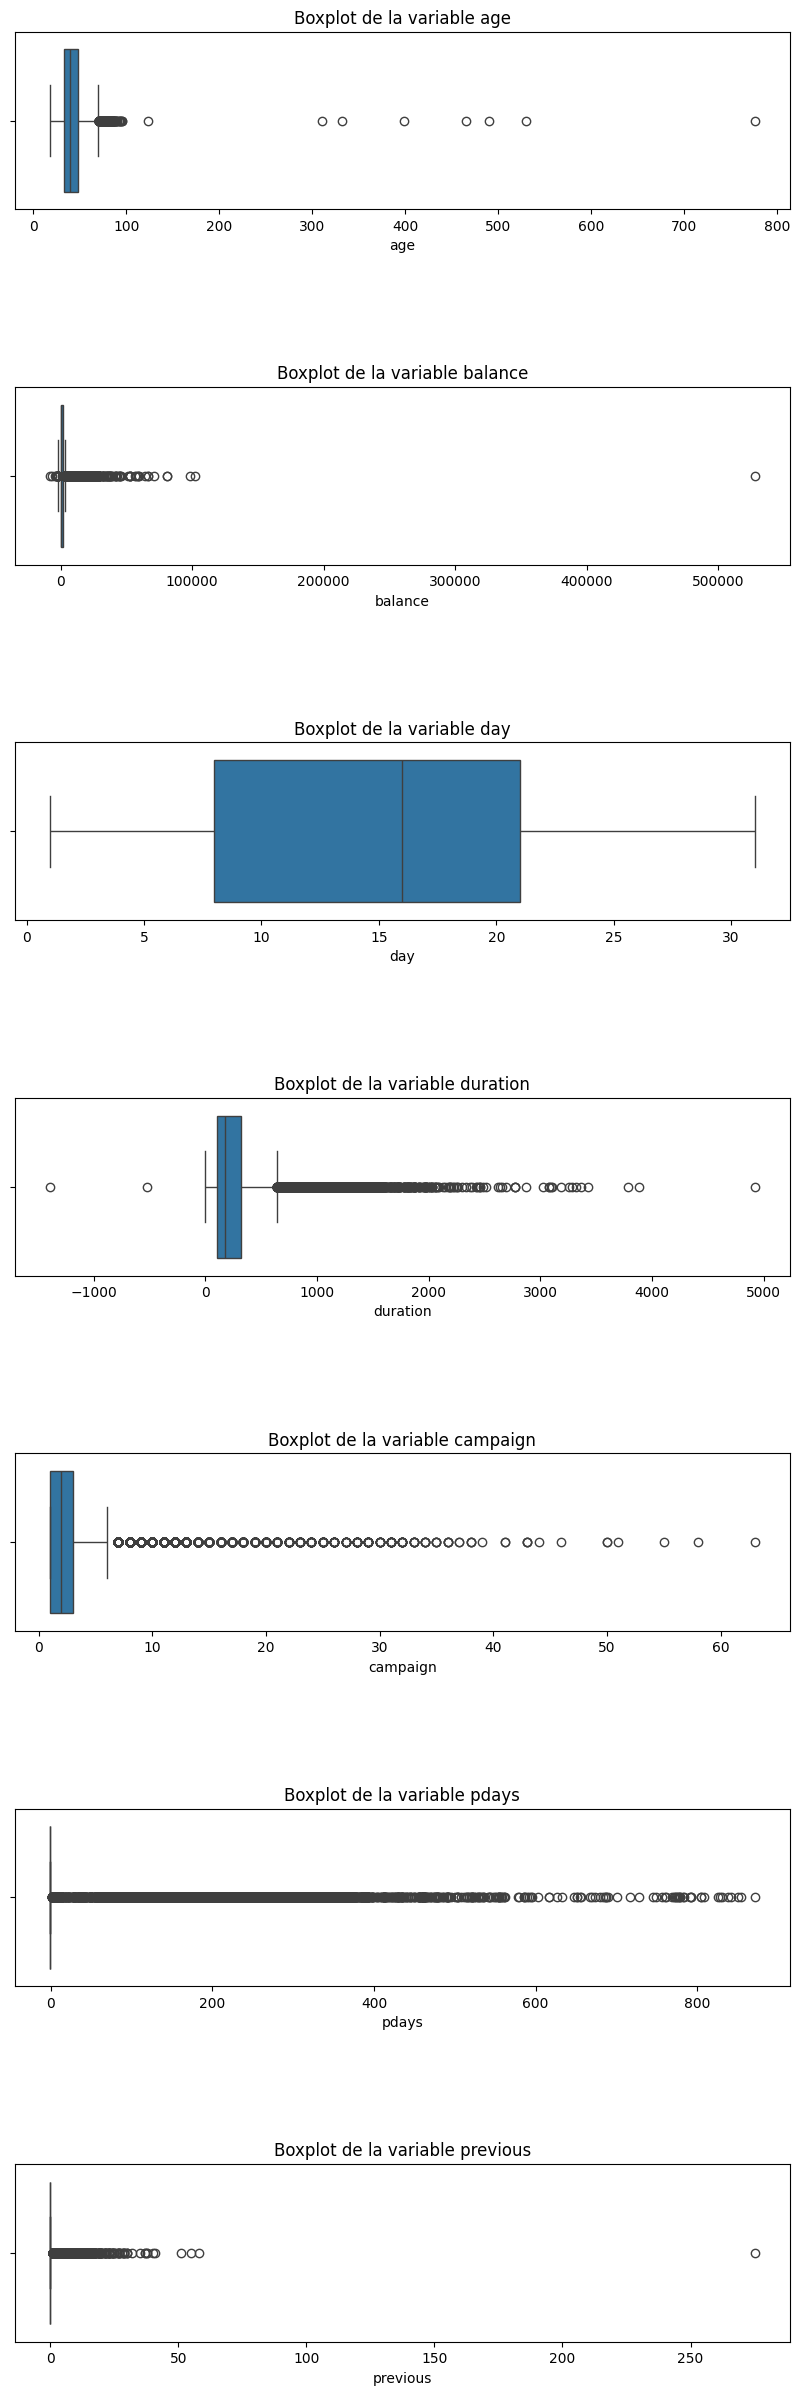

In [11]:
#generaremos graficas individuales ,pues las variableas numericas estan en rangos muy diferentes
cols_num=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(10,30))
fig.subplots_adjust(hspace=1) #espacio entre subplots filas

for i, col in enumerate(cols_num):
    sns.boxplot(x=col ,data=data,ax=ax[i])
    ax[i].set_title(f'Boxplot de la variable {col}')




**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)

In [12]:
print(f'Tamaño del dataset antes de eliminar los outliers de los registros de edad: {data.shape}')

data=data[data['age']<=100]

print(f'Tamaño del dataset después de eliminar los outliers de los registros de edad: {data.shape}')

Tamaño del dataset antes de eliminar los outliers de los registros de edad: (45203, 17)
Tamaño del dataset después de eliminar los outliers de los registros de edad: (45195, 17)


In [13]:
print(f'Tamaño del dataset antes de eliminar los outliers de los registros de duration: {data.shape}')

data=data[data['duration']>0]

print(f'Tamaño del dataset después de eliminar los outliers de los registros de duration: {data.shape}')

Tamaño del dataset antes de eliminar los outliers de los registros de duration: (45195, 17)
Tamaño del dataset después de eliminar los outliers de los registros de duration: (45190, 17)


In [14]:
print(f'Tamaño del dataset antes de eliminar los outliers de los registros de previous: {data.shape}')

data=data[data['previous']<=100]

print(f'Tamaño del dataset después de eliminar los outliers de los registros de previous: {data.shape}')

Tamaño del dataset antes de eliminar los outliers de los registros de previous: (45190, 17)
Tamaño del dataset después de eliminar los outliers de los registros de previous: (45189, 17)


C:\Users\josep\AppData\Local\Temp\ipykernel_5560\4231941157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,ax=ax[i],palette='Set2')
C:\Users\josep\AppData\Local\Temp\ipykernel_5560\4231941157.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\josep\AppData\Local\Temp\ipykernel_5560\4231941157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,ax=ax[i],palette='Set2')
C:\Users\josep\AppData\Local\Temp\ipykernel_5560\4231941157.py:8: UserWarning: set_ticklabels() should only be used with a fixed numb

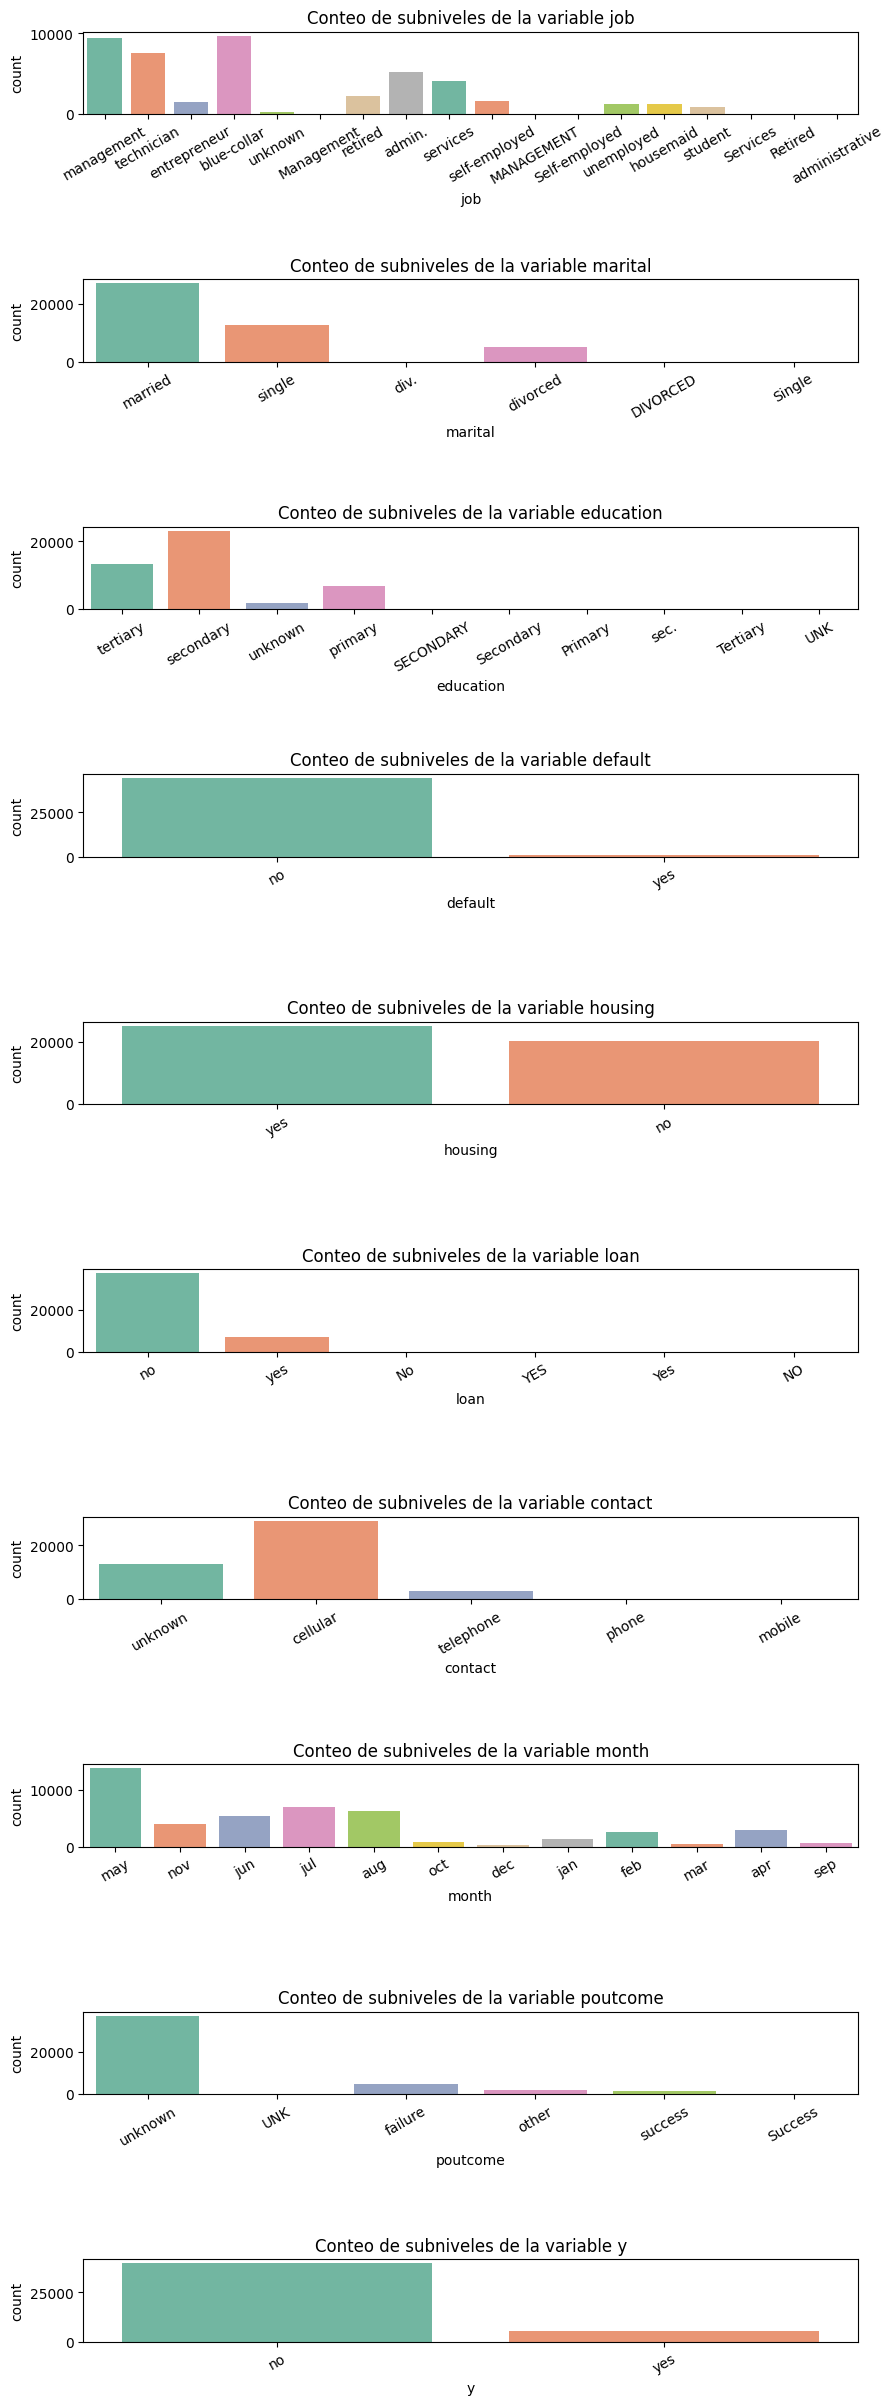

In [15]:
# Graficar los subniveles de cada variable categórica "cols_cat"
fig,ax=plt.subplots(nrows=10,ncols=1,figsize=(10,30)) 
fig.subplots_adjust(hspace=2) #espacio entre subplots filas

for i,col in enumerate(cols_cat):
    sns.countplot(x=col,data=data,ax=ax[i],palette='Set2')
    ax[i].set_title(f'Conteo de subniveles de la variable {col}')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)



C:\Users\josep\AppData\Local\Temp\ipykernel_5560\3440825701.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,ax=ax[i],palette='Set2')
C:\Users\josep\AppData\Local\Temp\ipykernel_5560\3440825701.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\josep\AppData\Local\Temp\ipykernel_5560\3440825701.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,ax=ax[i],palette='Set2')
C:\Users\josep\AppData\Local\Temp\ipykernel_5560\3440825701.py:13: UserWarning: set_ticklabels() should only be used with a fixed 

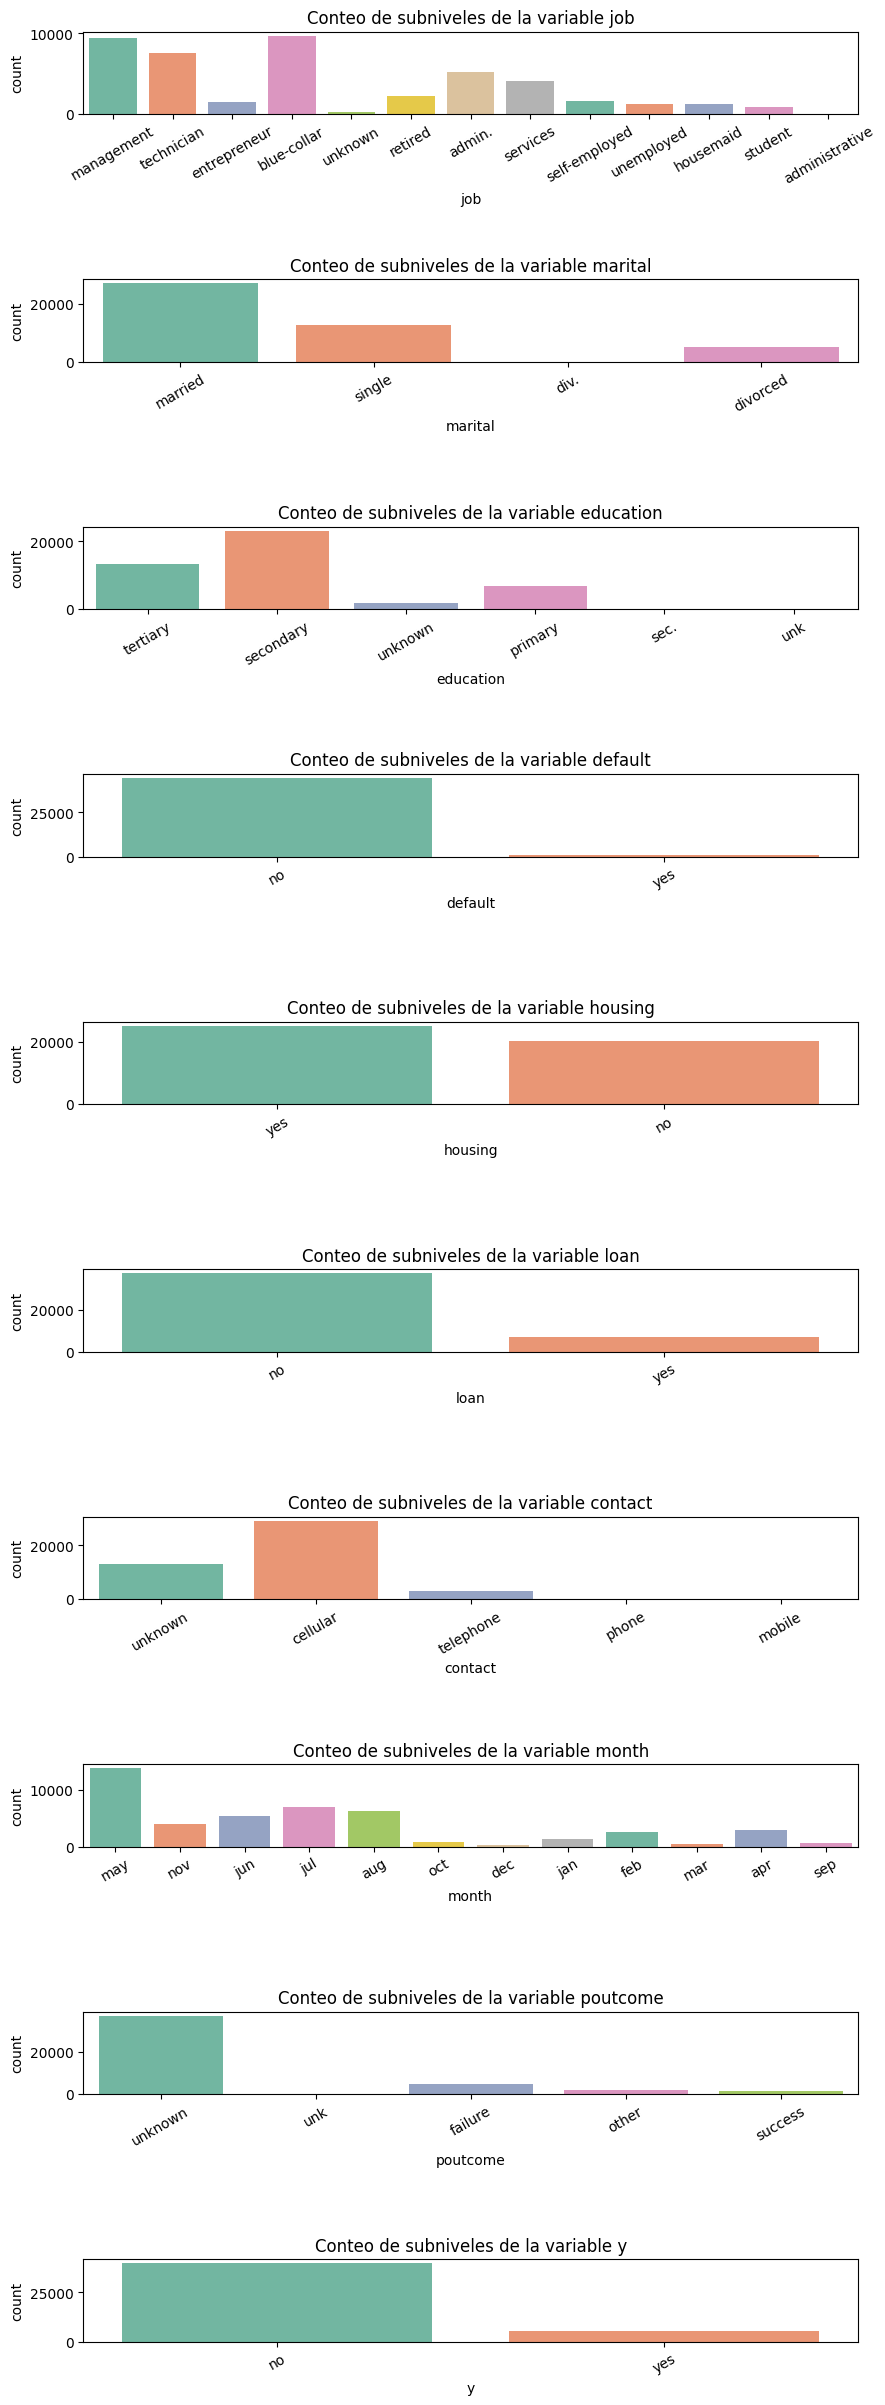

In [16]:
for colum in cols_cat:
    # Representar en minúsculas sólo si la columna es categórica
    if colum in cols_cat:
        data[colum]=data[colum].str.lower() #convertir a minusculas

#genraremos al graficas nuevamente
fig,ax=plt.subplots(nrows=10,ncols=1,figsize=(10,30)) 
fig.subplots_adjust(hspace=2) #espacio entre subplots filas

for i,col in enumerate(cols_cat):
    sns.countplot(x=col,data=data,ax=ax[i],palette='Set2')
    ax[i].set_title(f'Conteo de subniveles de la variable {col}')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


    

In [17]:
#job: unificar  admin. y administrador
print(f'Valores únicos de la columna job antes de la unificación: {data["job"].unique()}')
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
print(f'Valores únicos de la columna job después de la unificación: {data["job"].unique()}')


Valores únicos de la columna job antes de la unificación: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
Valores únicos de la columna job después de la unificación: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [18]:
print(f'Valores únicos de la columna marital antes de la unificación: {data["marital"].unique()}')
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
print(f'Valores únicos de la columna marital después de la unificación: {data["marital"].unique()}')

Valores únicos de la columna marital antes de la unificación: ['married' 'single' 'div.' 'divorced']
Valores únicos de la columna marital después de la unificación: ['married' 'single' 'divorced']


In [19]:
print(f'Valores únicos de la columna education antes de la unificación: {data["education"].unique()}')
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
print(f'Valores únicos de la columna education después de la unificación: {data["education"].unique()}')

Valores únicos de la columna education antes de la unificación: ['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
Valores únicos de la columna education después de la unificación: ['tertiary' 'secondary' 'unknown' 'primary']


In [20]:
print(f'Valores únicos de la columna contact antes de la unificación: {data["contact"].unique()}')
data.loc[data['contact']=='phone','contact'] = 'telephone'
data.loc[data['contact']=='mobile','contact'] = 'cellular'
print(f'Valores únicos de la columna contact después de la unificación: {data["contact"].unique()}')

Valores únicos de la columna contact antes de la unificación: ['unknown' 'cellular' 'telephone' 'phone' 'mobile']
Valores únicos de la columna contact después de la unificación: ['unknown' 'cellular' 'telephone']


In [21]:
print(f'Valores únicos de la columna poutcome antes de la unificación: {data["poutcome"].unique()}')
data.loc[data['poutcome']=='unk','poutcome'] = 'unknown'
print(f'Valores únicos de la columna poutcome después de la unificación: {data["poutcome"].unique()}')


Valores únicos de la columna poutcome antes de la unificación: ['unknown' 'unk' 'failure' 'other' 'success']
Valores únicos de la columna poutcome después de la unificación: ['unknown' 'failure' 'other' 'success']


In [23]:
data.shape

(45189, 17)

In [24]:
data.to_csv('dataset/dataset_banco_limpio.csv',index=False)